# Práctica 4: Procesamiento del Lenguaje Natural

__Fecha de entrega: 14 de mayo de 2024__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [70]:
RANDOM_STATE = 1234

# 1) Carga del conjunto de datos

El fichero `spam.csv` contiene mensajes SMS etiquetados como spam or ham (legítimo).

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 60% para entrenamiento, 20% para validación y el 20% restante para test. Comprueba que la distribución de los ejemplos en las particiones es similar. 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
csv_data = 'spam.csv'
data = pd.read_csv(csv_data, encoding='latin-1')
spam = data.loc[data['v1'] == 'spam'].sample(5, random_state=RANDOM_STATE)
ham = data.loc[data['v1'] == 'ham'].sample(5, random_state=RANDOM_STATE)

In [73]:
def preprocess_data(mail):
    mail = mail.lower()
    mail = mail.replace('subject', '')
    return mail

spam['v2'] = spam['v2'].apply(preprocess_data)
ham['v2'] = ham['v2'].apply(preprocess_data)

In [74]:
spam.iloc[0]['v2']

"u've been selected to stay in 1 of 250 top british hotels - for nothing! holiday valued at å£350! dial 08712300220 to claim - national rate call. bx526, sw73ss"

In [75]:
ham.iloc[0]['v2']

'actually i deleted my old website..now i m blogging at magicalsongs.blogspot.com'

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.4, random_state=RANDOM_STATE)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_STATE)

<Axes: title={'center': 'Training set'}, xlabel='v1'>

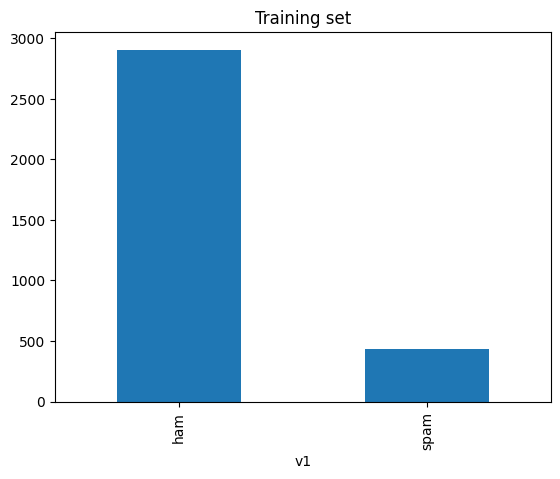

In [77]:
y_train.value_counts().plot(kind='bar', title='Training set')

<Axes: title={'center': 'Test set'}, xlabel='v1'>

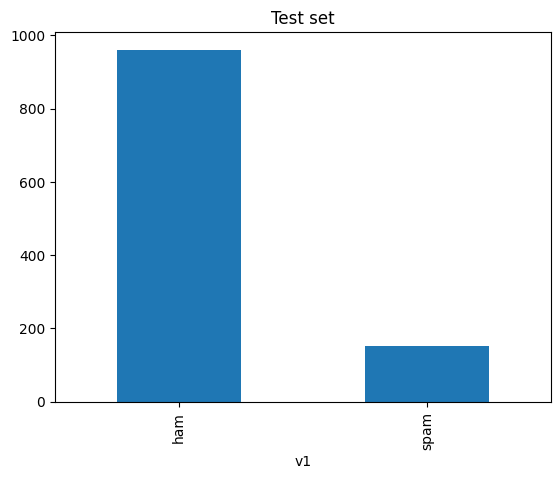

In [78]:
y_test.value_counts().plot(kind='bar', title='Test set')

<Axes: title={'center': 'Validation set'}, xlabel='v1'>

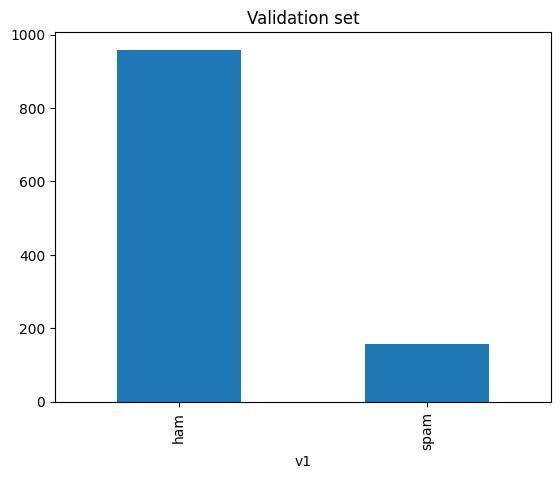

In [79]:
y_val.value_counts().plot(kind='bar', title='Validation set')

In [80]:
# Contamos las palabras que hay en el conjunto de datos
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
len(count_vectorizer.vocabulary_)
count_vectorizer.vocabulary_


{'bring': 1292,
 'home': 2954,
 'some': 5392,
 'wendy': 6368,
 'just': 3299,
 'checked': 1512,
 'out': 4281,
 'heading': 2869,
 'to': 5929,
 'drop': 2106,
 'off': 4187,
 'my': 3982,
 'stuff': 5595,
 'now': 4140,
 'lt': 3627,
 'decimal': 1887,
 'gt': 2770,
 'but': 1348,
 'its': 3205,
 'not': 4128,
 'common': 1647,
 'car': 1418,
 'here': 2906,
 'so': 5379,
 'better': 1138,
 'buy': 1352,
 'from': 2582,
 'china': 1540,
 'or': 4254,
 'asia': 923,
 'if': 3062,
 'find': 2443,
 'it': 3199,
 'less': 3476,
 'expensive': 2324,
 'll': 3549,
 'holla': 2950,
 'had': 2795,
 'already': 778,
 'sabarish': 5027,
 'asked': 927,
 'me': 3761,
 'go': 2689,
 'sarcasm': 5060,
 'nt': 4145,
 'scarcasim': 5080,
 'sick': 5265,
 'needy': 4042,
 'want': 6293,
 'you': 6600,
 'pouts': 4563,
 'stomps': 5552,
 'feet': 2407,
 'where': 6392,
 'are': 884,
 'slave': 5323,
 'him': 2923,
 'awesome': 997,
 'be': 1083,
 'there': 5847,
 'in': 3097,
 'minute': 3841,
 'haha': 2798,
 've': 6189,
 'been': 1104,
 '4u': 440,
 'couple'

In [81]:
count_vectorizer_list = [c for c in count_vectorizer.vocabulary_.keys() if len(c) > 3] 
print(len(count_vectorizer_list))
count_vectorizer_list

5639


['bring',
 'home',
 'some',
 'wendy',
 'just',
 'checked',
 'heading',
 'drop',
 'stuff',
 'decimal',
 'common',
 'here',
 'better',
 'from',
 'china',
 'asia',
 'find',
 'less',
 'expensive',
 'holla',
 'already',
 'sabarish',
 'asked',
 'sarcasm',
 'scarcasim',
 'sick',
 'needy',
 'want',
 'pouts',
 'stomps',
 'feet',
 'where',
 'slave',
 'awesome',
 'there',
 'minute',
 'haha',
 'been',
 'couple',
 'times',
 'coming',
 'pleased',
 'inform',
 'that',
 'your',
 'application',
 'airtel',
 'broadband',
 'processed',
 'successfully',
 'installation',
 'will',
 'happen',
 'within',
 'days',
 'alright',
 'sure',
 'know',
 'when',
 'leaving',
 '88800',
 '89034',
 'premium',
 'phone',
 'services',
 'call',
 '08718711108',
 'yeah',
 'give',
 'minutes',
 'track',
 'down',
 'wallet',
 'sexy',
 'singles',
 'waiting',
 'text',
 'followed',
 'gender',
 'wither',
 'xmas',
 'iscoming',
 'awarded',
 'either',
 'gift',
 'vouchers',
 'free',
 'entry',
 'weekly',
 'draw',
 'music',
 '87066',
 'ldew',
 '

In [82]:
count_vectorizer_train_spam = count_vectorizer.fit(X_train[y_train == 'spam'])

In [83]:
count_vectorizer_train_spam = [(c,v)for (c,v) in count_vectorizer.vocabulary_.items() if len(c) > 3]
count_vectorizer_train_spam.sort(key=lambda x: x[1], reverse=True)
count_vectorizer_train_spam

[('ûïharry', 2220),
 ('ûªve', 2218),
 ('åòit', 2217),
 ('åòharry', 2216),
 ('zouk', 2215),
 ('yours', 2211),
 ('your', 2210),
 ('yesterday', 2206),
 ('years', 2203),
 ('year', 2202),
 ('yards', 2201),
 ('yahoo', 2200),
 ('xxxxxx', 2198),
 ('xxxxx', 2197),
 ('xxxmobilemovieclub', 2196),
 ('xxuk', 2194),
 ('xxsp', 2193),
 ('xmas', 2191),
 ('xclusive', 2190),
 ('xchat', 2189),
 ('xafter', 2188),
 ('wtlp', 2185),
 ('would', 2182),
 ('worth', 2180),
 ('worlds', 2179),
 ('world', 2178),
 ('work', 2177),
 ('word', 2176),
 ('women', 2174),
 ('wkly', 2172),
 ('wkent', 2171),
 ('wkend', 2170),
 ('within', 2167),
 ('wither', 2166),
 ('with', 2165),
 ('wish', 2164),
 ('wire3', 2163),
 ('wins', 2162),
 ('winnersclub', 2161),
 ('winner', 2160),
 ('wining', 2159),
 ('wings', 2158),
 ('win150ppmx3age16', 2157),
 ('willing', 2155),
 ('will', 2154),
 ('wildest', 2153),
 ('wicklow', 2151),
 ('whose', 2149),
 ('while', 2147),
 ('which', 2146),
 ('where', 2145),
 ('when', 2144),
 ('whats', 2143),
 ('what',

In [84]:
count_vectorizer_train_ham = count_vectorizer.fit(X_train[y_train == 'ham'])
count_vectorizer_train_ham = [(c,v)for (c,v) in count_vectorizer.vocabulary_.items() if len(c) > 3]
count_vectorizer_train_ham.sort(key=lambda x: x[1], reverse=True)
count_vectorizer_train_ham

[('ûówell', 5220),
 ('û_thanks', 5216),
 ('zyada', 5210),
 ('zoom', 5209),
 ('zindgi', 5207),
 ('zealand', 5206),
 ('yunny', 5202),
 ('yummy', 5200),
 ('yummmm', 5199),
 ('ything', 5198),
 ('yowifes', 5195),
 ('yoville', 5194),
 ('youwanna', 5193),
 ('youuuuu', 5192),
 ('yourself', 5191),
 ('yours', 5190),
 ('youre', 5189),
 ('your', 5188),
 ('youphone', 5187),
 ('younger', 5186),
 ('young', 5185),
 ('youdoing', 5184),
 ('yorge', 5182),
 ('yogasana', 5180),
 ('yoga', 5179),
 ('yijue', 5176),
 ('yifeng', 5175),
 ('yetunde', 5173),
 ('yetty', 5172),
 ('yesterday', 5170),
 ('yest', 5169),
 ('yeovil', 5166),
 ('yellow', 5164),
 ('yelling', 5163),
 ('yeesh', 5161),
 ('years', 5160),
 ('year', 5159),
 ('yeah', 5158),
 ('yaxxx', 5156),
 ('yaxx', 5155),
 ('yavnt', 5154),
 ('yarasu', 5153),
 ('yalru', 5149),
 ('yalrigu', 5148),
 ('yahoo', 5147),
 ('xxxxxxxxxxxxxx', 5143),
 ('xxxxxxx', 5142),
 ('xxxxx', 5141),
 ('xuhui', 5138),
 ('xoxo', 5137),
 ('xmas', 5136),
 ('xavier', 5134),
 ('wylie', 5132

# 2) Representación como bolsa de palabras

Elige justificadamente una representación de bolsa de palabras y aplícala.
Muestra un ejemplo antes y después de aplicar la representación. Explica los cambios.

# 3) Aplica 3 algoritmos de aprendizaje automático para resolver la tarea

Justifica porqué los has elegido.
Ajusta los modelos respecto a un hiperparámetro que consideres oportuno. Justifica tu elección.
Explica los resultados obtenidos.

# 4) Construye redes neuronales con Keras con distintas maneras de usar word embeddings

Justifica tus decisiones y explica los resultados obtenidos.

# 5) Aplica los modelos construidos a los datos de test y compáralos.

Calcula las métricas de recall, precisión y f1.
Discute cual es el mejor modelo y cual es peor y porqué.